# Importing Data

In [1]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b40860d77d25457fa3bba298c09d6fd1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jXY_0Ds9d_MJwDIpJYAPNNUOVbBvSsSDxV01kZsgi7wW',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b40860d77d25457fa3bba298c09d6fd1.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-bvoxfhwyyiulxm',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Importing the Required Libraries 

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing

Getting the values statics value in order to get better understanding of the data provided.

In [3]:
df = df_data_1.copy()
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<p>Observation about the data - </p>
<ul>
    <li>The minimum infant deaths is 0 which is hard to beleive</li>
    <li>The minimum adult mortalility is 1. This means there are some outliers in the data.</li>
    <li>Similarly the under-five death can't be 0.</li>
    <li>BMI value of 1 seems to low and value of 87.3 seems to high for any person to have.</li>
    <li>Population of 34 also seems unrealstic.</li> 
</ul>
<p>So these values needs to be corrected inorder to get more accurate prediction</p>

In [4]:
# Checking the null and NaN fields in the dataset.
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# Splitting the Status into 2 different columns to convert it into a feature.
dummy_status = pd.get_dummies(df['Status'])
df = pd.concat([df , dummy_status] , axis = 1)
df.drop('Status',axis = 1,inplace = True)
df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [6]:
# Filling the NaN values with the Mean of each column so as to maintain the number of data points

df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.010000,71.279624,65.000000,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.010000,73.523582,62.000000,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.010000,73.219243,64.000000,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.010000,78.184215,67.000000,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.010000,7.097109,68.000000,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.010000,79.679367,66.000000,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.010000,56.762217,63.000000,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.030000,25.873925,64.000000,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.020000,10.910156,63.000000,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.030000,17.171518,64.000000,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [7]:
# Checking if their are still NaN values
df.isnull().sum()

Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                           0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [8]:
# Removing the points that still have nan values

df.dropna(inplace = True)

In [9]:
# Splitting the data into features and target.

X = df.copy()
X.drop('Life expectancy ',axis = 1,inplace = True)
X.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [10]:
y = df['Life expectancy '].copy()
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

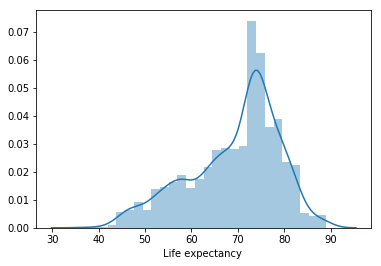

In [24]:
plt.figure()
sns.distplot(y)
plt.show()

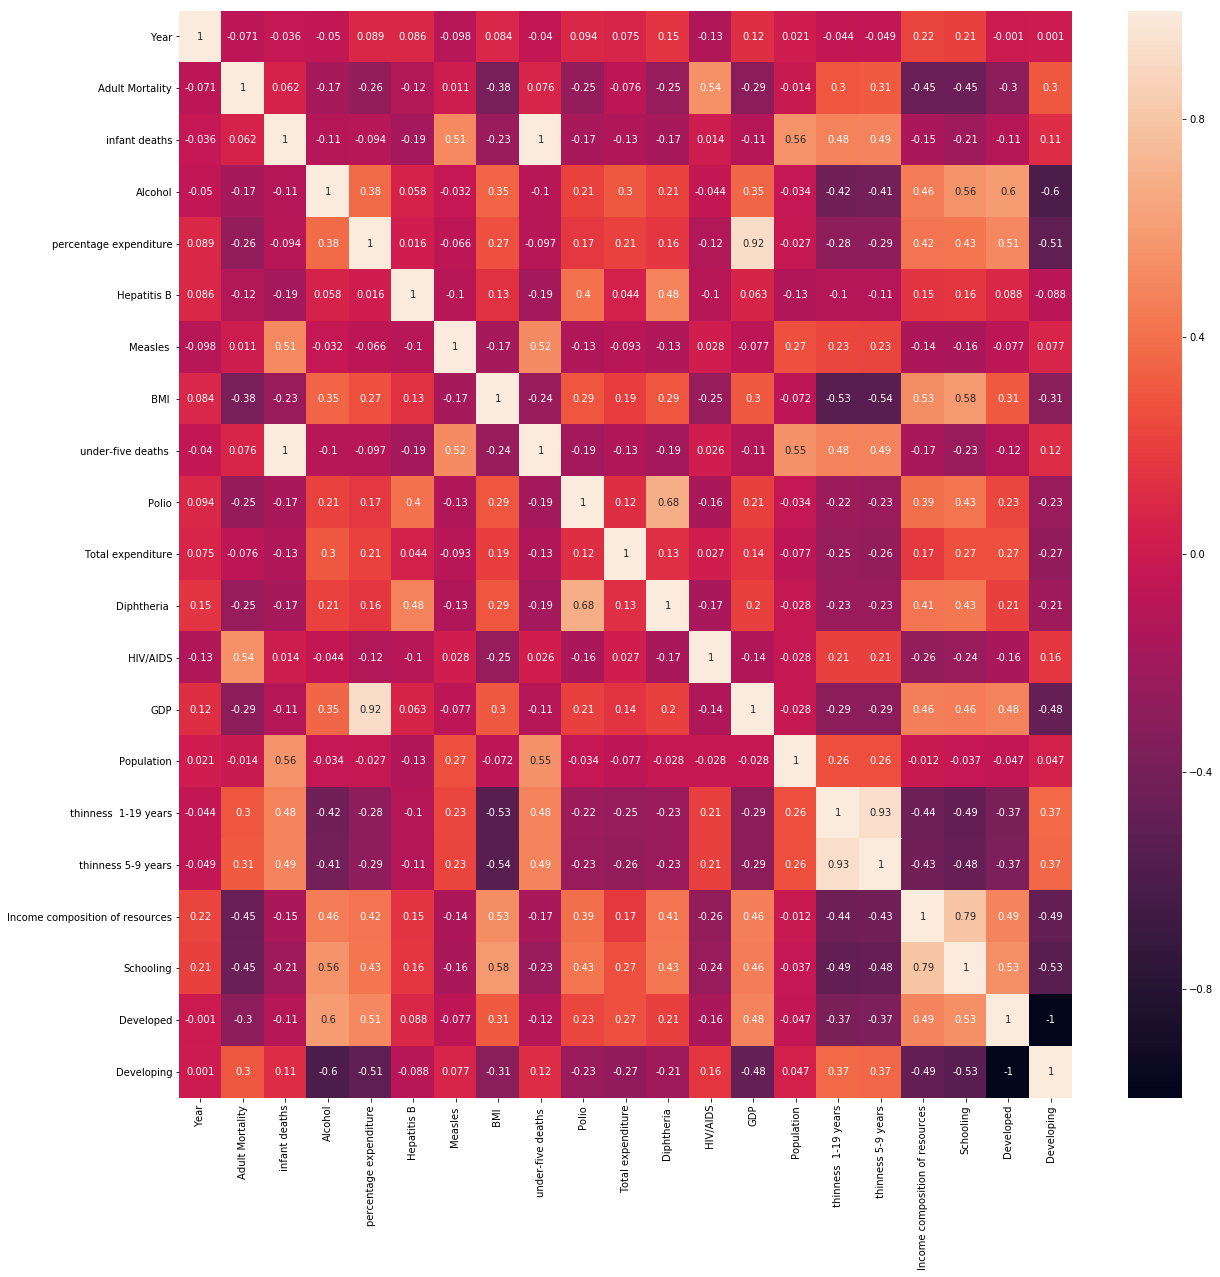

In [11]:
# Getting the correation between different columns inorder to remove the high similar columns 
# Threshold taken of val >=0.9 and val <=-0.9
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)

In [12]:
X.drop(['Country','under-five deaths ',' thinness  1-19 years','GDP','Developing'],axis = 1 , inplace = True)
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.3,0.479,10.1,0
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,0
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,18.0,0.463,9.8,0
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,0


In [13]:
# Getting the names of the remaining columns 
X_col_req = X.columns

# Applying Machine Learning

In [14]:
# Spliting the data into test and train set
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [15]:
# Normailising the integer data

ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


# Hyperparameter Tuning

In [17]:
# Creating a object of RandomForestRegressor for hyperparameter tuning
m = RandomForestRegressor(bootstrap=False)

In [18]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [100, 110,150,170,200],
    'max_features': [10, 12 , 15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200,250, 300,400]
}

grid_search = GridSearchCV(estimator = m, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
best = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 33.3min finished


In [19]:
# Getting the values of the best parameters
best.best_params_

{'max_depth': 170,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

# Prediction Using the Selected Model

In [16]:
# Training RandomForestRegressor with the parameters provided by the gridSearch above
model = RandomForestRegressor(bootstrap=False,max_depth=110,max_features=10,min_samples_leaf=3,min_samples_split=8,n_estimators=200,random_state=1)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

3.232068600046827


In [29]:
model.score(X_test,y_test)

0.9683257974328403

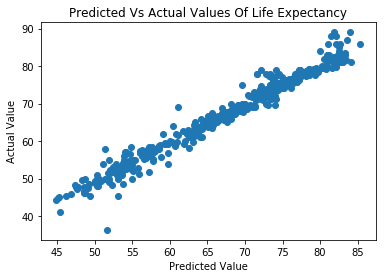

In [22]:
plt.figure()
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Predicted Vs Actual Values Of Life Expectancy")
plt.show()

In [36]:
print( "MAE Value: " , metrics.mean_absolute_error(y_test,y_pred))
print( "MSE Value: " , metrics.mean_squared_error(y_test,y_pred))
print( "RSME Value: " , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE Value:  1.1169747747189136
MSE Value:  3.232068600046827
RSME Value:  1.7977954833759113


# Creating Client

In [37]:
!pip install watson-machine-learning-client

In [38]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [39]:
wml_credentials = {
  "apikey": "LXWUu1NALSbYAL_iC6HY0QNwVICIgPzB_y5fw_Eeff2v",
  "instance_id": "69e2a6c7-79b1-4701-b83e-fc2b74649362",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [40]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [41]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME: "Harshit Garg",
    client.repository.ModelMetaNames.NAME: "Life Expectancy Prediction",
}

In [42]:
model_artifact = client.repository.store_model(model,meta_props = model_props)

In [44]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [45]:
published_model_uid

'471e7955-a80a-40fb-87c7-98b2a4465d60'

In [47]:
# client.deployments.list()

----  ----  ----  -----  -------  ---------  -------------
GUID  NAME  TYPE  STATE  CREATED  FRAMEWORK  ARTIFACT TYPE
----  ----  ----  -----  -------  ---------  -------------


In [ ]:
# client.deployments.delete('model_id')

In [48]:
deployment = client.deployments.create(published_model_uid,name = "Life_Expectancy_Prediction")



#######################################################################################

Synchronous deployment creation for uid: '471e7955-a80a-40fb-87c7-98b2a4465d60' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ffdd83fd-3b8a-46f8-9d6b-e6597380b95d'
------------------------------------------------------------------------------------------------




In [49]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [50]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/69e2a6c7-79b1-4701-b83e-fc2b74649362/deployments/ffdd83fd-3b8a-46f8-9d6b-e6597380b95d/online'

In [21]:
# Add Comments
# Add Titles and and content
# Adding pred vs actual graph